/tmp/ipykernel_16834/3769599292.py:24: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=None)
/home/koyilada-keerti/my_env/lib/python3.12/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
[src/libmpg123/parse.c:skip_junk():1276] error: Giving up searching valid MPEG header after 65536 bytes of junk.


First few pitch values: [324.52634, 377.94614, 151.98074, 169.98326, 164.14772, 165.24294, 169.60797, 166.02426, 163.34138, 168.07623]


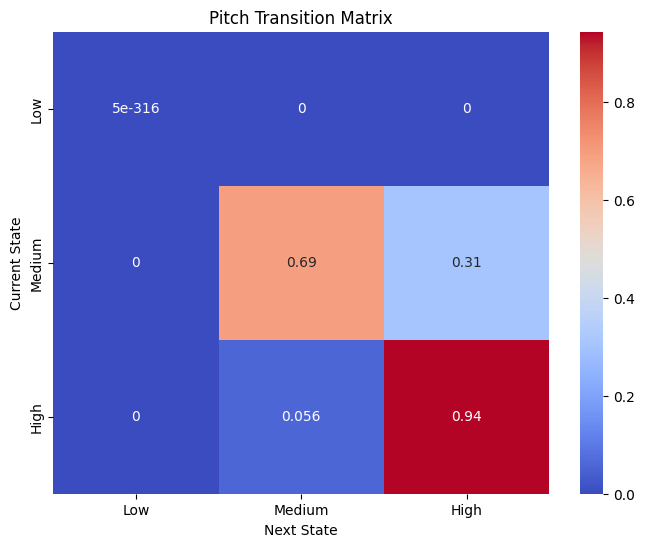

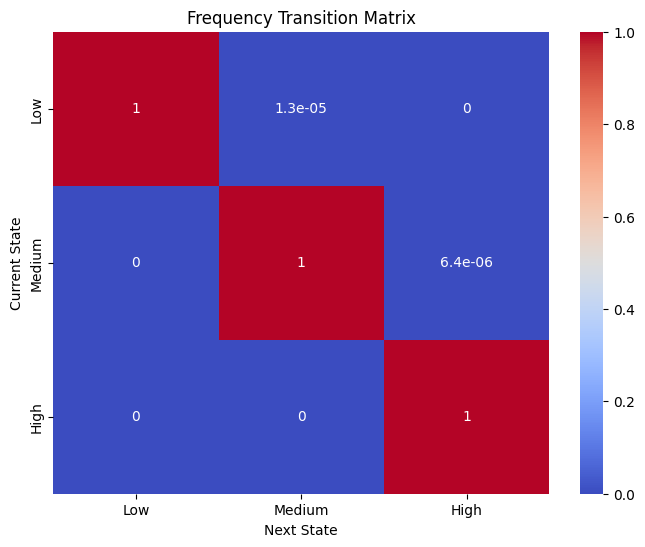

Articulation Rate State: Low


[src/libmpg123/parse.c:skip_junk():1276] error: Giving up searching valid MPEG header after 65536 bytes of junk.
/tmp/ipykernel_16834/3769599292.py:24: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=None)
/home/koyilada-keerti/my_env/lib/python3.12/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


First few pitch values: [809.10095, 952.7424, 407.36887, 370.98962, 376.73376, 369.84274, 368.81656, 367.59763, 369.07568, 369.51917]


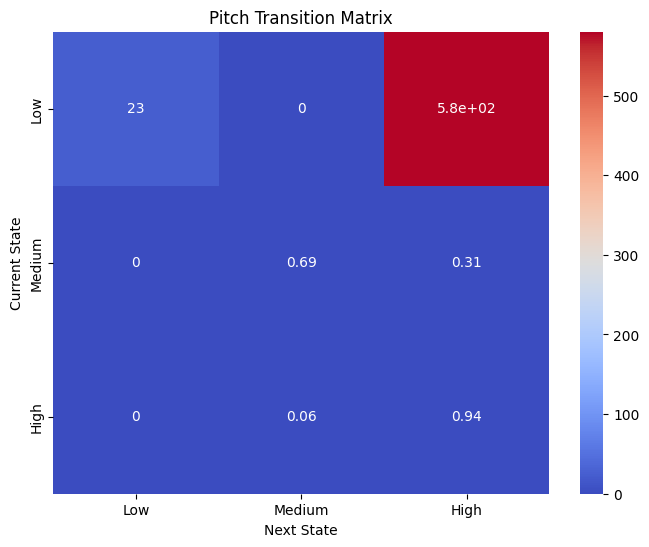

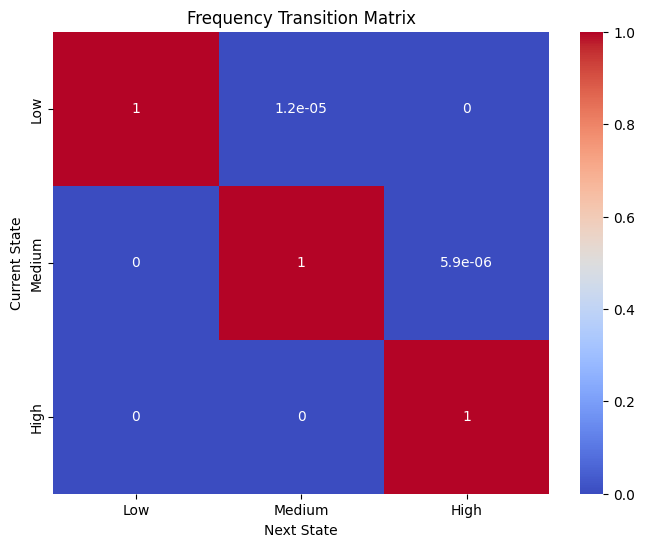

Articulation Rate State: Low


[src/libmpg123/parse.c:skip_junk():1276] error: Giving up searching valid MPEG header after 65536 bytes of junk.
/tmp/ipykernel_16834/3769599292.py:24: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=None)
/home/koyilada-keerti/my_env/lib/python3.12/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


First few pitch values: [335.83987, 256.28226, 241.06679, 2124.4014, 1571.8002, 347.20685, 366.987, 3982.6284, 3968.3657, 3969.6565]


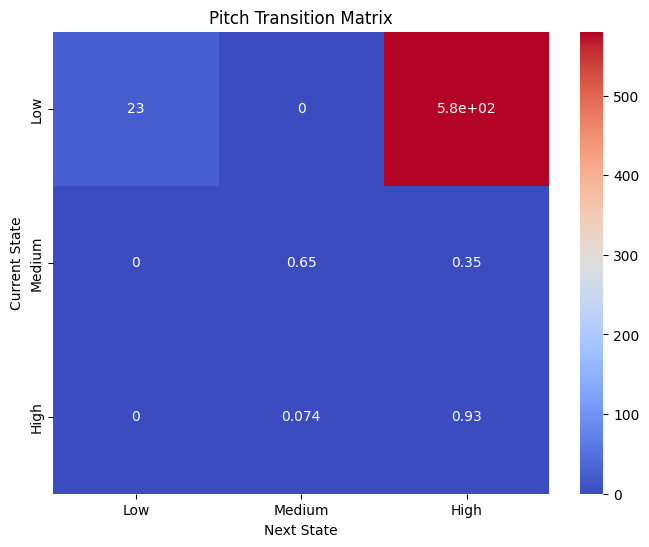

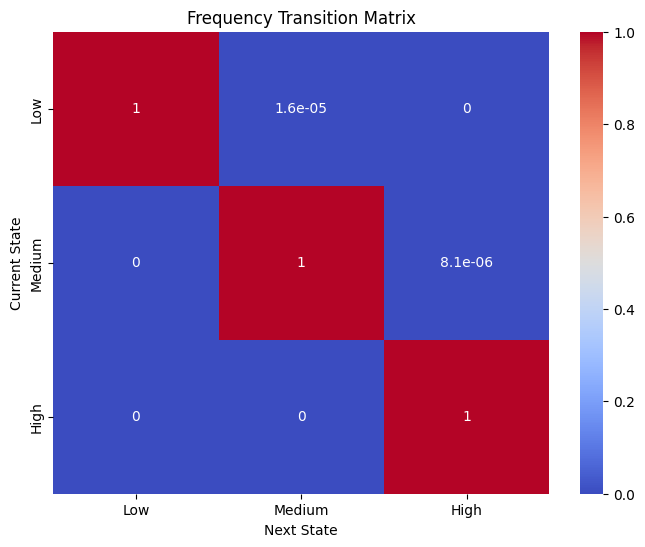

Articulation Rate State: Low


[src/libmpg123/parse.c:skip_junk():1276] error: Giving up searching valid MPEG header after 65536 bytes of junk.
/tmp/ipykernel_16834/3769599292.py:24: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=None)
/home/koyilada-keerti/my_env/lib/python3.12/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


First few pitch values: [1507.6506, 174.45622, 168.86993, 740.0423, 298.13916, 375.81454, 366.98087, 1769.229, 1778.667, 1786.6093]


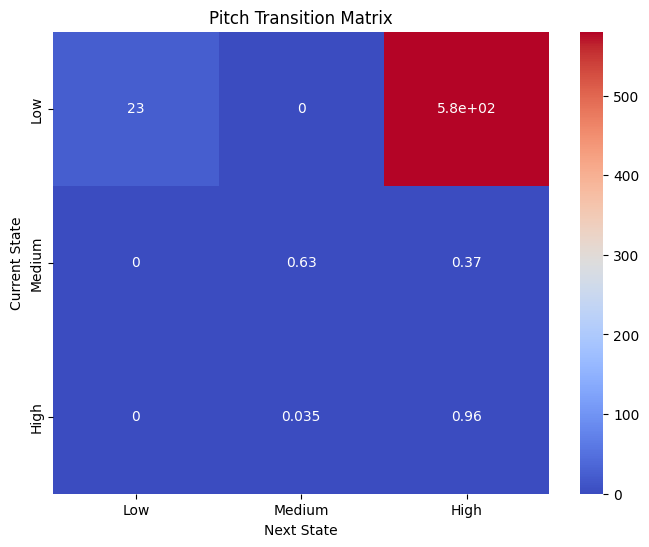

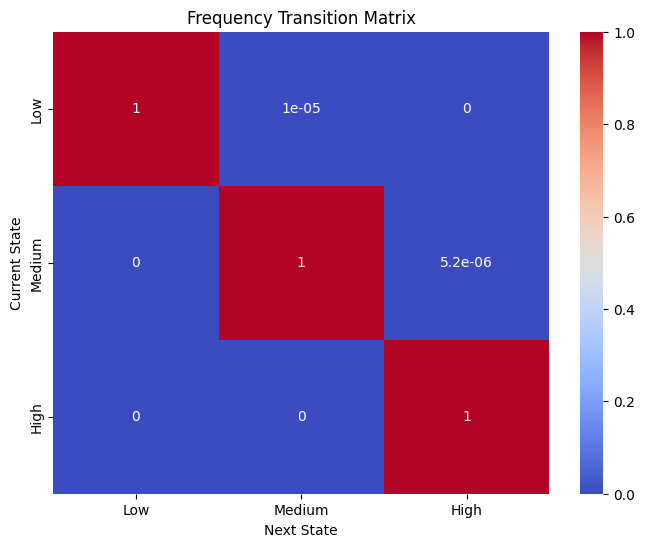

Articulation Rate State: Low


In [1]:
import os
from pytube import YouTube
import librosa
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to download YouTube audio
def download_youtube_audio(url, output_path):
    try:
        yt = YouTube(url)
        stream = yt.streams.filter(only_audio=True).first()
        output_file = stream.download(output_path=output_path)
        base, ext = os.path.splitext(output_file)
        new_file = base + '.mp3'
        os.rename(output_file, new_file)
        return new_file
    except Exception as e:
        print(f"Error downloading audio from {url}: {e}")
        return None

# Function to analyze audio features
def analyze_audio_features(audio_path):
    y, sr = librosa.load(audio_path, sr=None)
    
    # Pitch
    pitches, magnitudes = librosa.core.piptrack(y=y, sr=sr)
    pitch_values = [pitches[magnitudes[:, i].argmax(), i] for i in range(pitches.shape[1]) if magnitudes[:, i].max() > 0]
    pitch_values = [pitch for pitch in pitch_values if pitch > 0]  # Filter out zero values
    
    # Print first few pitch values for debugging
    print("First few pitch values:", pitch_values[:10])
    
    # Frequency (using FFT)
    frequency = librosa.fft_frequencies(sr=sr, n_fft=len(y))
    
    # Articulation Rate
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    duration = librosa.get_duration(y=y, sr=sr)
    articulation_rate = tempo / duration if duration > 0 else 0
    
    return {
        'pitch': pitch_values,
        'frequency': frequency,
        'articulation_rate': articulation_rate
    }

# Function to classify pitch into states
def classify_pitch(pitch_values):
    pitch_states = []
    for pitch in pitch_values:
        if pitch < 100:
            pitch_states.append('Low')
        elif 100 <= pitch < 200:
            pitch_states.append('Medium')
        else:
            pitch_states.append('High')
    return pitch_states

# Function to classify frequency into states
def classify_frequency(frequency_values):
    frequency_states = []
    for freq in frequency_values:
        if freq < 500:
            frequency_states.append('Low')
        elif 500 <= freq < 1500:
            frequency_states.append('Medium')
        else:
            frequency_states.append('High')
    return frequency_states

# Function to classify articulation rate into states
def classify_articulation_rate(articulation_rate):
    if articulation_rate < 2:
        return 'Low'
    elif 2 <= articulation_rate < 5:
        return 'Medium'
    else:
        return 'High'

# Function to create transition matrix
def create_transition_matrix(states, feature_states):
    state_indices = {state: idx for idx, state in enumerate(states)}
    n_states = len(states)
    transition_matrix = np.zeros((n_states, n_states))
    
    for (current_state, next_state) in zip(feature_states[:-1], feature_states[1:]):
        i = state_indices[current_state]
        j = state_indices[next_state]
        transition_matrix[i, j] += 1
    
    # Normalize the matrix to get probabilities
    row_sums = transition_matrix.sum(axis=1, keepdims=True)
    transition_matrix = np.divide(transition_matrix, row_sums, where=row_sums != 0)
    return transition_matrix

# Define YouTube video URLs and output path
video_urls = [
'https://youtu.be/Q4kR6vM8xvQ?si=UOVaHgyTqw9ccA9h',
'https://youtu.be/Zf2RzRgD3t8?si=TFaguHrOB6YhbLRd',
'https://youtu.be/N2cs7b8er1A?si=AlYFzhgpA5KsHX7T',
'https://youtu.be/pi8PZgn4ZCc?si=Qc-4wAMYmZ5XY5Pc'
]
output_path = '/home/koyilada-keerti/Downloads/audio_output'

# Process each video
for url in video_urls:
    audio_path = download_youtube_audio(url, output_path)
    if audio_path:
        features = analyze_audio_features(audio_path)

        # Classify features into states
        pitch_states = classify_pitch(features['pitch'])
        frequency_states = classify_frequency(features['frequency'])
        articulation_rate_state = classify_articulation_rate(features['articulation_rate'])

        # Create transition matrices for pitch and frequency
        states = ['Low', 'Medium', 'High']
        pitch_transition_matrix = create_transition_matrix(states, pitch_states)
        frequency_transition_matrix = create_transition_matrix(states, frequency_states)

        # Plot heatmap for pitch transition matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(pitch_transition_matrix, annot=True, cmap='coolwarm', xticklabels=states, yticklabels=states)
        plt.title('Pitch Transition Matrix')
        plt.xlabel('Next State')
        plt.ylabel('Current State')
        plt.show()

        # Plot heatmap for frequency transition matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(frequency_transition_matrix, annot=True, cmap='coolwarm', xticklabels=states, yticklabels=states)
        plt.title('Frequency Transition Matrix')
        plt.xlabel('Next State')
        plt.ylabel('Current State')
        plt.show()

        # Print articulation rate state
        print(f"Articulation Rate State: {articulation_rate_state}")
    else:
        print("Failed to download or extract audio from the video.")


/tmp/ipykernel_16834/3763215696.py:24: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=None)
/home/koyilada-keerti/my_env/lib/python3.12/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
[src/libmpg123/parse.c:skip_junk():1276] error: Giving up searching valid MPEG header after 65536 bytes of junk.


First few pitch values: [324.52634, 377.94614, 151.98074, 169.98326, 164.14772, 165.24294, 169.60797, 166.02426, 163.34138, 168.07623]


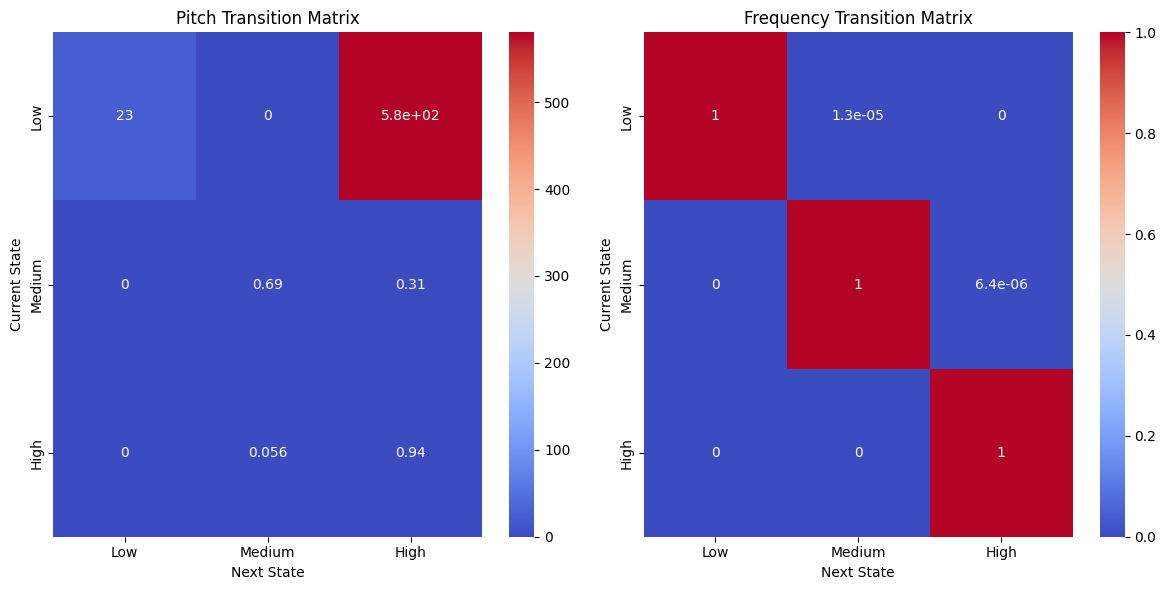

Articulation Rate State: Low


[src/libmpg123/parse.c:skip_junk():1276] error: Giving up searching valid MPEG header after 65536 bytes of junk.
/tmp/ipykernel_16834/3763215696.py:24: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=None)
/home/koyilada-keerti/my_env/lib/python3.12/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


First few pitch values: [809.10095, 952.7424, 407.36887, 370.98962, 376.73376, 369.84274, 368.81656, 367.59763, 369.07568, 369.51917]


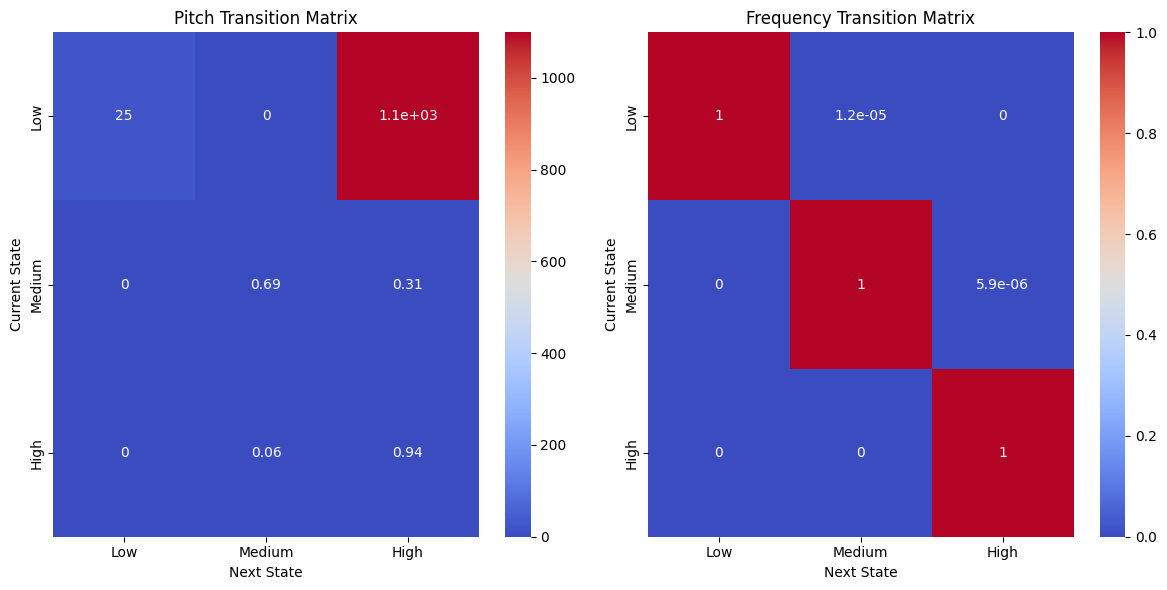

Articulation Rate State: Low


[src/libmpg123/parse.c:skip_junk():1276] error: Giving up searching valid MPEG header after 65536 bytes of junk.
/tmp/ipykernel_16834/3763215696.py:24: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=None)
/home/koyilada-keerti/my_env/lib/python3.12/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


First few pitch values: [335.83987, 256.28226, 241.06679, 2124.4014, 1571.8002, 347.20685, 366.987, 3982.6284, 3968.3657, 3969.6565]


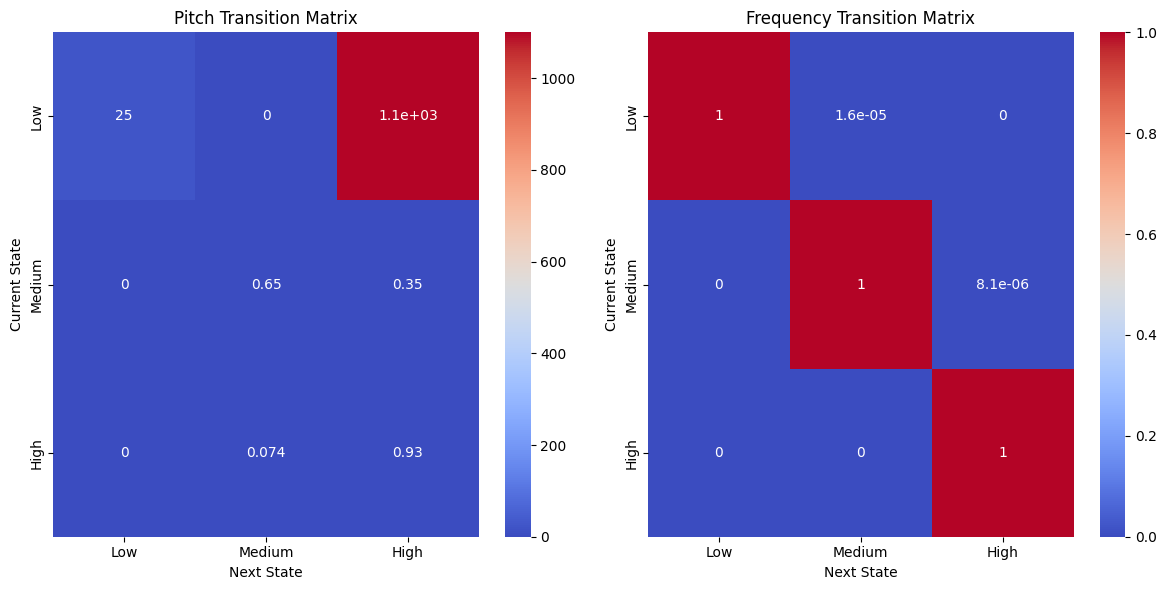

Articulation Rate State: Low


[src/libmpg123/parse.c:skip_junk():1276] error: Giving up searching valid MPEG header after 65536 bytes of junk.
/tmp/ipykernel_16834/3763215696.py:24: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=None)
/home/koyilada-keerti/my_env/lib/python3.12/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


First few pitch values: [1507.6506, 174.45622, 168.86993, 740.0423, 298.13916, 375.81454, 366.98087, 1769.229, 1778.667, 1786.6093]


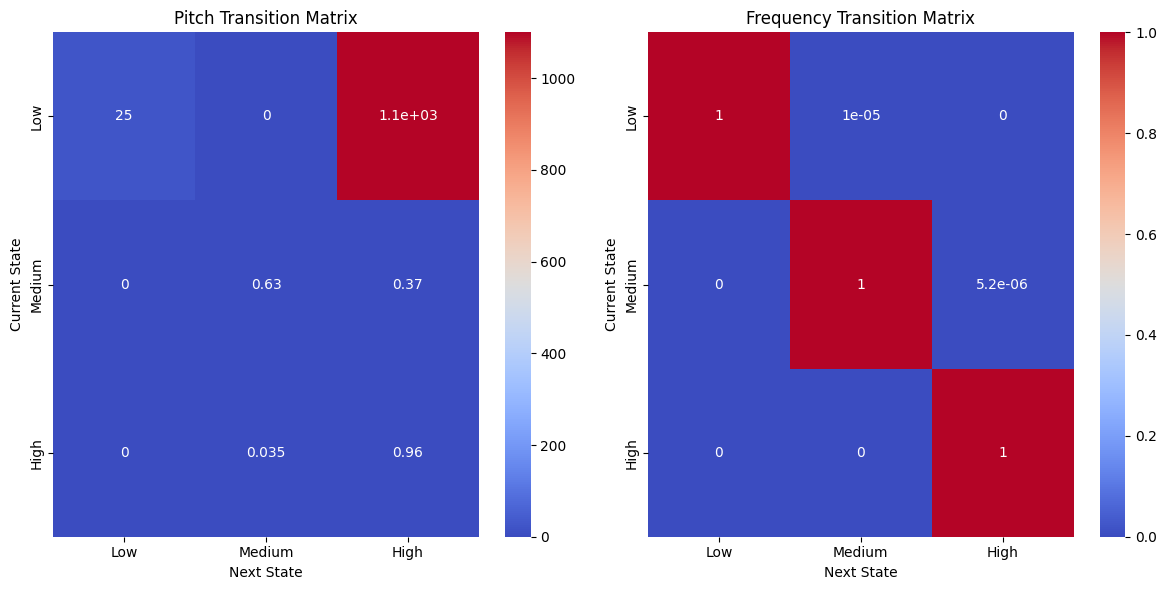

Articulation Rate State: Low


In [2]:
import os
from pytube import YouTube
import librosa
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to download YouTube audio
def download_youtube_audio(url, output_path):
    try:
        yt = YouTube(url)
        stream = yt.streams.filter(only_audio=True).first()
        output_file = stream.download(output_path=output_path)
        base, ext = os.path.splitext(output_file)
        new_file = base + '.mp3'
        os.rename(output_file, new_file)
        return new_file
    except Exception as e:
        print(f"Error downloading audio from {url}: {e}")
        return None

# Function to analyze audio features
def analyze_audio_features(audio_path):
    y, sr = librosa.load(audio_path, sr=None)
    
    # Pitch
    pitches, magnitudes = librosa.core.piptrack(y=y, sr=sr)
    pitch_values = [pitches[magnitudes[:, i].argmax(), i] for i in range(pitches.shape[1]) if magnitudes[:, i].max() > 0]
    pitch_values = [pitch for pitch in pitch_values if pitch > 0]  # Filter out zero values
    
    # Print first few pitch values for debugging
    print("First few pitch values:", pitch_values[:10])
    
    # Frequency (using FFT)
    frequency = librosa.fft_frequencies(sr=sr, n_fft=len(y))
    
    # Articulation Rate
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    duration = librosa.get_duration(y=y, sr=sr)
    articulation_rate = tempo / duration if duration > 0 else 0
    
    return {
        'pitch': pitch_values,
        'frequency': frequency,
        'articulation_rate': articulation_rate
    }

# Function to classify pitch into states
def classify_pitch(pitch_values):
    pitch_states = []
    for pitch in pitch_values:
        if pitch < 100:
            pitch_states.append('Low')
        elif 100 <= pitch < 200:
            pitch_states.append('Medium')
        else:
            pitch_states.append('High')
    return pitch_states

# Function to classify frequency into states
def classify_frequency(frequency_values):
    frequency_states = []
    for freq in frequency_values:
        if freq < 500:
            frequency_states.append('Low')
        elif 500 <= freq < 1500:
            frequency_states.append('Medium')
        else:
            frequency_states.append('High')
    return frequency_states

# Function to classify articulation rate into states
def classify_articulation_rate(articulation_rate):
    if articulation_rate < 2:
        return 'Low'
    elif 2 <= articulation_rate < 5:
        return 'Medium'
    else:
        return 'High'

# Function to create transition matrix
def create_transition_matrix(states, feature_states):
    state_indices = {state: idx for idx, state in enumerate(states)}
    n_states = len(states)
    transition_matrix = np.zeros((n_states, n_states))
    
    for (current_state, next_state) in zip(feature_states[:-1], feature_states[1:]):
        i = state_indices[current_state]
        j = state_indices[next_state]
        transition_matrix[i, j] += 1
    
    # Normalize the matrix to get probabilities
    row_sums = transition_matrix.sum(axis=1, keepdims=True)
    transition_matrix = np.divide(transition_matrix, row_sums, where=row_sums != 0)
    return transition_matrix

# Define YouTube video URLs and output path
video_urls = [
    'https://youtu.be/Q4kR6vM8xvQ?si=UOVaHgyTqw9ccA9h',
    'https://youtu.be/Zf2RzRgD3t8?si=TFaguHrOB6YhbLRd',
    'https://youtu.be/N2cs7b8er1A?si=AlYFzhgpA5KsHX7T',
    'https://youtu.be/pi8PZgn4ZCc?si=Qc-4wAMYmZ5XY5Pc'
]
output_path = '/home/koyilada-keerti/Downloads/audio_output'

# Process each video
for url in video_urls:
    audio_path = download_youtube_audio(url, output_path)
    if audio_path:
        features = analyze_audio_features(audio_path)

        # Classify features into states
        pitch_states = classify_pitch(features['pitch'])
        frequency_states = classify_frequency(features['frequency'])
        articulation_rate_state = classify_articulation_rate(features['articulation_rate'])

        # Create transition matrices for pitch and frequency
        states = ['Low', 'Medium', 'High']
        pitch_transition_matrix = create_transition_matrix(states, pitch_states)
        frequency_transition_matrix = create_transition_matrix(states, frequency_states)

        # Plot heatmap for pitch transition matrix
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        sns.heatmap(pitch_transition_matrix, annot=True, cmap='coolwarm', xticklabels=states, yticklabels=states)
        plt.title('Pitch Transition Matrix')
        plt.xlabel('Next State')
        plt.ylabel('Current State')

        # Plot heatmap for frequency transition matrix
        plt.subplot(1, 2, 2)
        sns.heatmap(frequency_transition_matrix, annot=True, cmap='coolwarm', xticklabels=states, yticklabels=states)
        plt.title('Frequency Transition Matrix')
        plt.xlabel('Next State')
        plt.ylabel('Current State')

        plt.tight_layout()
        plt.show()

        # Print articulation rate state
        print(f"Articulation Rate State: {articulation_rate_state}")
    else:
        print("Failed to download or extract audio from the video.")
